In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/MP2/')

In [0]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [0]:
img = cv2.imread('benign_4x/_11001.tif')
img_gt = cv2.imread('benign_4x/_11001_gt.png')
img_gt = np.array(img_gt)

<bound method Figure.show of <Figure size 1080x1080 with 2 Axes>>

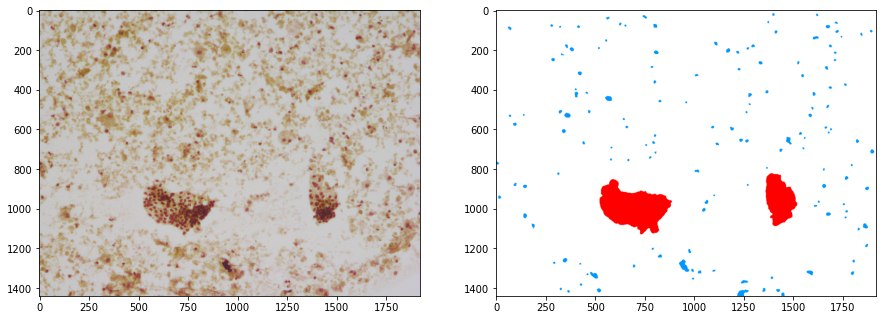

In [21]:
fig, (a1,a2) = plt.subplots(1,2, figsize=(15,15))
a1.imshow(img)
a2.imshow(img_gt)
fig.show

In [29]:
df = []
thetaAll = []
sigmaAll = []
gammaAll = []
lamdaAll = []
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                #filtered_img = fimg.reshape(-1)
                #df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                df.append(fimg)
                thetaAll.append(theta)
                sigmaAll.append(sigma)
                lamdaAll.append(lamda)
                gammaAll.append(gamma)
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                

#df.to_csv("Gabor.csv")

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [0]:
df = np.array(df)
thetaAll = np.array(thetaAll)
sigmaAll = np.array(sigmaAll)
gammaAll = np.array(gammaAll)
lamdaAll = np.array(lamdaAll)


In [24]:
print(df.shape)

(32, 1440, 1920, 3)


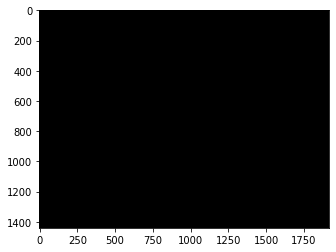

theta:  0.0  sigma:  1  gamme:  0.05  lamda:  0.0


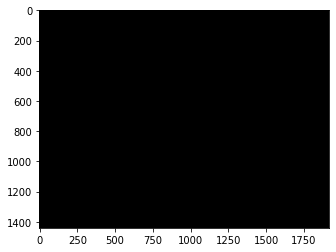

theta:  0.0  sigma:  1  gamme:  0.5  lamda:  0.0


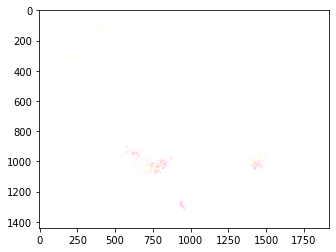

theta:  0.0  sigma:  1  gamme:  0.05  lamda:  0.7853981633974483


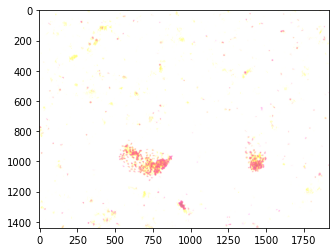

theta:  0.0  sigma:  1  gamme:  0.5  lamda:  0.7853981633974483


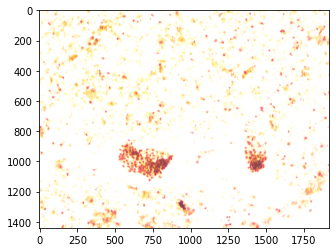

theta:  0.0  sigma:  1  gamme:  0.05  lamda:  1.5707963267948966


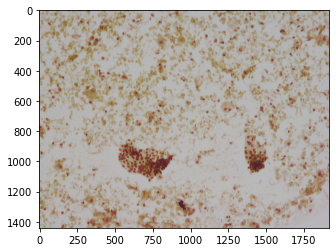

theta:  0.0  sigma:  1  gamme:  0.5  lamda:  1.5707963267948966


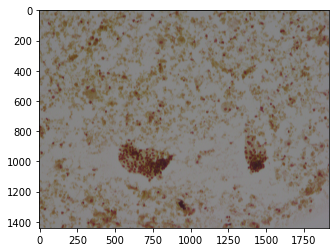

theta:  0.0  sigma:  1  gamme:  0.05  lamda:  2.356194490192345


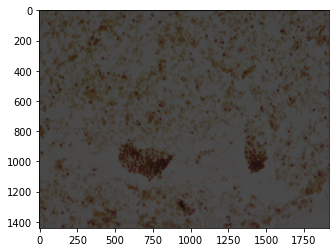

theta:  0.0  sigma:  1  gamme:  0.5  lamda:  2.356194490192345


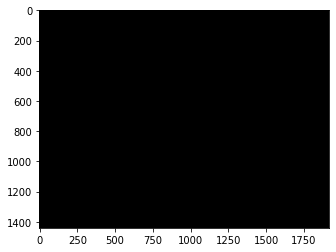

theta:  0.0  sigma:  3  gamme:  0.05  lamda:  0.0


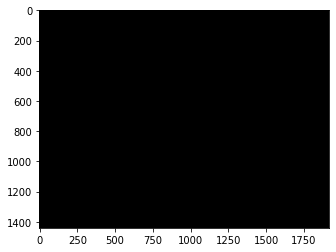

theta:  0.0  sigma:  3  gamme:  0.5  lamda:  0.0


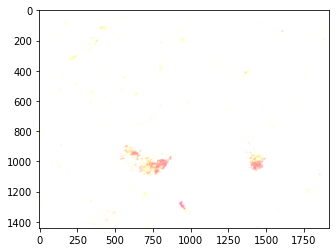

theta:  0.0  sigma:  3  gamme:  0.05  lamda:  0.7853981633974483


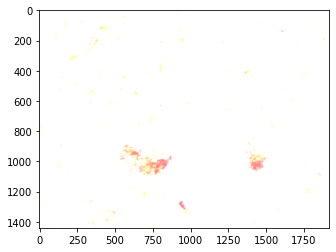

theta:  0.0  sigma:  3  gamme:  0.5  lamda:  0.7853981633974483


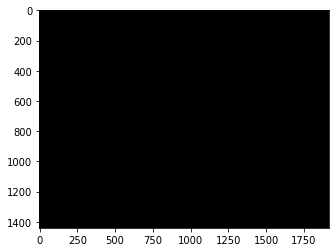

theta:  0.0  sigma:  3  gamme:  0.05  lamda:  1.5707963267948966


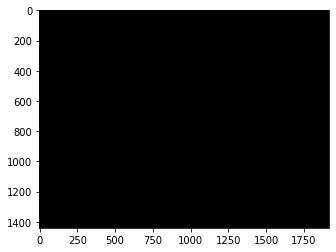

theta:  0.0  sigma:  3  gamme:  0.5  lamda:  1.5707963267948966


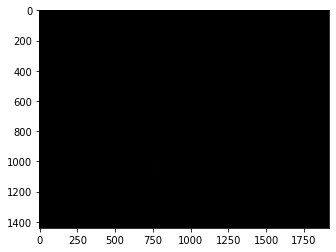

theta:  0.0  sigma:  3  gamme:  0.05  lamda:  2.356194490192345


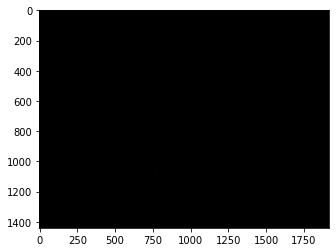

theta:  0.0  sigma:  3  gamme:  0.5  lamda:  2.356194490192345


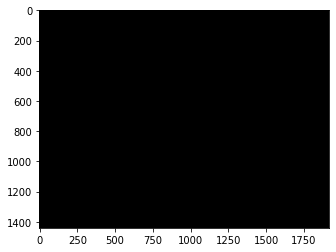

theta:  0.7853981633974483  sigma:  1  gamme:  0.05  lamda:  0.0


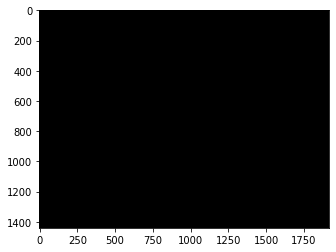

theta:  0.7853981633974483  sigma:  1  gamme:  0.5  lamda:  0.0


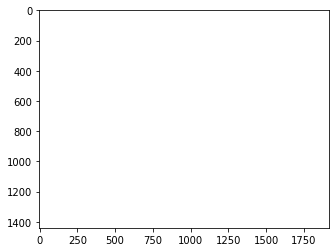

theta:  0.7853981633974483  sigma:  1  gamme:  0.05  lamda:  0.7853981633974483


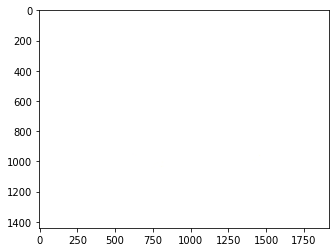

theta:  0.7853981633974483  sigma:  1  gamme:  0.5  lamda:  0.7853981633974483


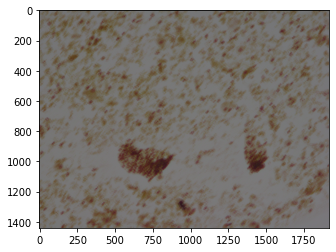

theta:  0.7853981633974483  sigma:  1  gamme:  0.05  lamda:  1.5707963267948966


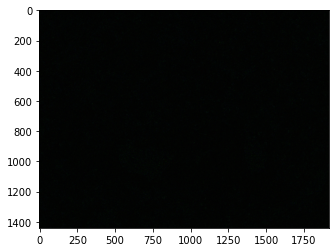

theta:  0.7853981633974483  sigma:  1  gamme:  0.5  lamda:  1.5707963267948966


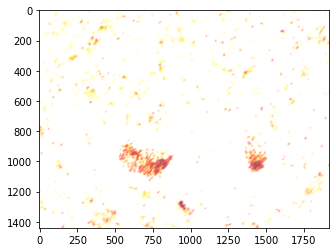

theta:  0.7853981633974483  sigma:  1  gamme:  0.05  lamda:  2.356194490192345


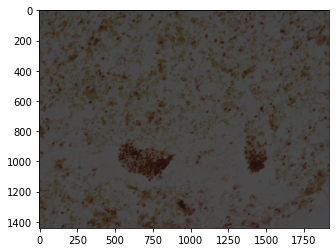

theta:  0.7853981633974483  sigma:  1  gamme:  0.5  lamda:  2.356194490192345


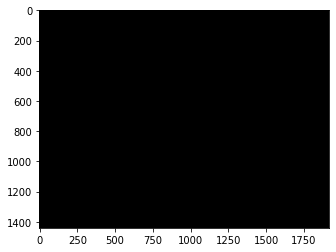

theta:  0.7853981633974483  sigma:  3  gamme:  0.05  lamda:  0.0


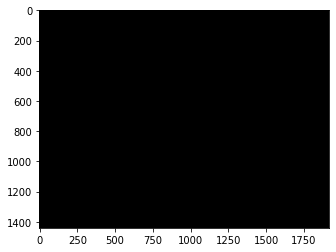

theta:  0.7853981633974483  sigma:  3  gamme:  0.5  lamda:  0.0


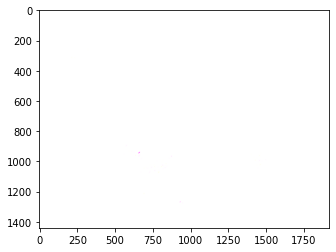

theta:  0.7853981633974483  sigma:  3  gamme:  0.05  lamda:  0.7853981633974483


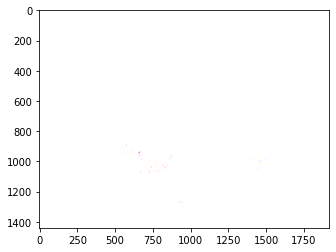

theta:  0.7853981633974483  sigma:  3  gamme:  0.5  lamda:  0.7853981633974483


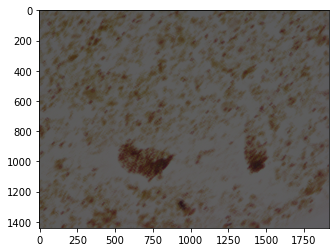

theta:  0.7853981633974483  sigma:  3  gamme:  0.05  lamda:  1.5707963267948966


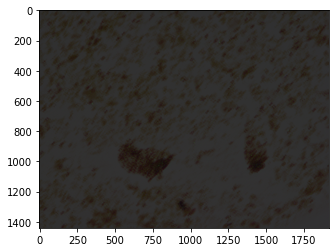

theta:  0.7853981633974483  sigma:  3  gamme:  0.5  lamda:  1.5707963267948966


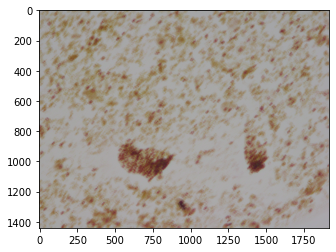

theta:  0.7853981633974483  sigma:  3  gamme:  0.05  lamda:  2.356194490192345


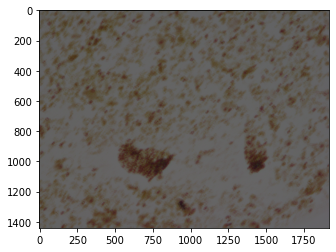

theta:  0.7853981633974483  sigma:  3  gamme:  0.5  lamda:  2.356194490192345


In [31]:
for i in range(len(df)):
  plt.imshow(df[i])
  plt.show()
  print("theta: ", thetaAll[i], " sigma: ", sigmaAll[i], " gamme: ", gammaAll[i], " lamda: ", lamdaAll[i])